In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error

In [76]:
df = pd.read_csv("Final.csv")
df.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [77]:
df.isnull().sum()

Unnamed: 0                0
Entity                    0
Code                      0
Year                      0
Cellular Subscription     0
Internet Users(%)         0
No. of Internet Users     0
Broadband Subscription    0
dtype: int64

In [174]:
country = input("enter the country :")

enter the country : United States


In [175]:
df_country = df[df['Entity'] == country]
df_country.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
8397,8397,United States,USA,1980,0.000000,0.0,0,0.0
8398,8398,United States,USA,1984,0.038446,0.0,0,0.0
8399,8399,United States,USA,1985,0.141461,0.0,0,0.0
8400,8400,United States,USA,1986,0.280860,0.0,0,0.0
8401,8401,United States,USA,1987,0.502282,0.0,0,0.0


In [176]:
# df_country = df_country.fillna(df_country.median())

In [177]:
# Select features and target variable
features = ['Year', 'Cellular Subscription', 'Broadband Subscription']
target = 'Internet Users(%)'

# Extract features and target
X = df_country[features].values
y = df_country[target].values

In [178]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [179]:
# Reshape X for LSTM (samples, time steps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [181]:
model = Sequential()

# Use Input layer to define the shape of the input
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input shape defined here
model.add(LSTM(units=64, return_sequences=True))  # No input_shape here
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(units=1))

In [182]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [183]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2441 - val_loss: 0.8340
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2406 - val_loss: 0.8206
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2354 - val_loss: 0.8072
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2326 - val_loss: 0.7939
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.2284 - val_loss: 0.7806
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.2233 - val_loss: 0.7672
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.2199 - val_loss: 0.7536
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2164 - val_loss: 0.7400
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2112 - val_loss: 0.7261
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2083 - val_loss: 0.7121
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2046 - val_loss: 0.6978
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.2001 - val_loss: 

In [196]:
# Predict on the test data
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [197]:
# Rescale the predictions and the actual values back to the original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

In [186]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 12.263639279136486


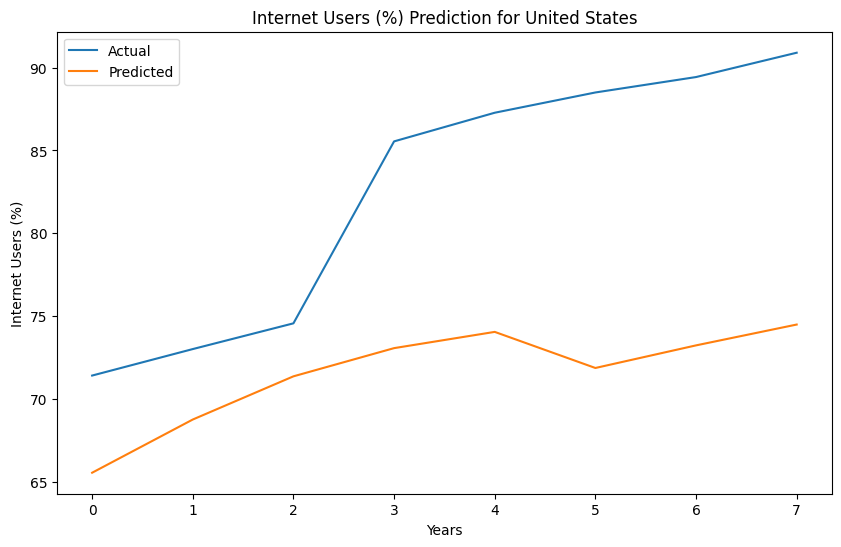

In [199]:
# Step 7: Plotting the Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title(f'Internet Users (%) Prediction for {country}')
plt.xlabel('Years')
plt.ylabel('Internet Users (%)')
plt.legend()
plt.show()

In [188]:
future_years = np.array([2021, 2022, 2023]).reshape(-1, 1) 

In [189]:
future_cellular = np.array([110, 115, 120]).reshape(-1, 1)  # Example data
future_broadband = np.array([60, 65, 70]).reshape(-1, 1) 

In [190]:
future_data = np.hstack((future_years, future_cellular, future_broadband))
future_data_scaled = scaler_X.transform(future_data)

In [191]:
# Reshape future data for LSTM
future_data_scaled = np.reshape(future_data_scaled, (future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

In [192]:
# Predict future internet penetration
future_predictions = model.predict(future_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


In [193]:
# Rescale the future predictions back to original scale
future_predictions_rescaled = scaler_y.inverse_transform(future_predictions)

In [194]:
for year, pred in zip(future_years.flatten(), future_predictions_rescaled.flatten()):
    print(f"Predicted Internet Users (%) for {year}: {pred:.2f}%")

Predicted Internet Users (%) for 2021: 88.66%
Predicted Internet Users (%) for 2022: 93.04%
Predicted Internet Users (%) for 2023: 97.43%
